# Wine type prediction

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from collections import Counter
from sklearn import model_selection,linear_model,metrics
import seaborn as sns
from statistics import mean
from matplotlib import style

## Introduction

Recently people like to drink alchol and wine plays an really important rule in the alchol family. In this project I will use the dataset from kaggles to predict the type of the wine such as red wine and white wine according to other 10 different variables including fixed acidity, volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality, in which all the variables except the quality, and type are continuous numerical variables. This project is published on github with the name of [Wine_quality_analysis](https://github.com/harrysyz99/Wine_quality_analysis)

This project also have a publish [github repo](https://github.com/harrysyz99/Wine_quality_analysis), and this project is using the MIT defult license. If you want to directly use all the information or you can directly use run the code without setting the environment or file path please look at the gitrepo and clone the git repo on your local machine.

## Dataset

This dataset is from kaggle free and public dataset the original name of the datset is called [Wine Quality](https://www.kaggle.com/datasets/rajyellow46/wine-quality). According to the discription this dataset is originally from the UCI data set website, which is called the same name [wine Quality on UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality),these two links has been copied to the references part at the end. These data set have is ordered by the type of the wine but the sample size between two types of the wine are different. Therefore when I preprocessed the dataset I need to do some spliting first. 

The next cell is loading the data and since there are some of the variables have na existed and in order to avoid the possible conflict, I used the dropna() function to drop every NA from the dataset.

In [2]:
winedataset = pd.read_csv("winequalityN.csv").dropna()
winedataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
typecount = winedataset.groupby("type").size()
typecount

type
red      1593
white    4870
dtype: int64

As I mentioned before the sample size between two type of the wine are diffenence and we can find out that there is a huge difference between two types. Since we will split the train test data I will randomly select 1593 white wine out of the 4870 white wine. In order to make sure that when we split the train and testing data we could have the same sample size between two types of wine in order to avoid any bias situation.

Text(0.5, 1.0, 'Figure 1: bar plot for the amount for red wine and white wine')

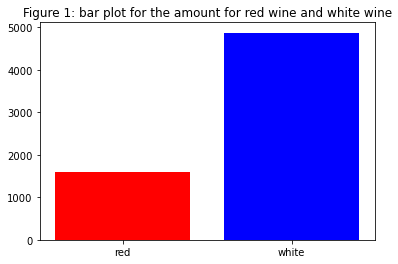

In [4]:
plt.bar(x = ["red","white"], height=[typecount["red"],typecount["white"]], color = ["red","blue"])
plt.title("Figure 1: bar plot for the amount for red wine and white wine")

In [5]:
index = random.sample(list(range(0,4870,1)),1593)
white = winedataset[winedataset.type == "white"].iloc[index]
white
red = winedataset[winedataset.type == "red"]
red

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
finaldata = pd.concat([white,red])
finaldata

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4385,white,6.4,0.260,0.21,8.20,0.050,51.0,182.0,0.99542,3.23,0.48,9.50,5
2947,white,5.1,0.290,0.28,8.30,0.026,27.0,107.0,0.99308,3.36,0.37,11.00,6
2610,white,6.3,0.270,0.46,11.10,0.053,44.0,177.0,0.99691,3.18,0.67,9.40,5
4812,white,5.1,0.260,0.33,1.10,0.027,46.0,113.0,0.98946,3.35,0.43,11.40,7
4730,white,7.9,0.300,0.60,1.85,0.048,13.0,106.0,0.99331,3.24,0.49,11.85,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.90,0.068,28.0,38.0,0.99651,3.42,0.82,9.50,6
6492,red,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.58,10.50,5
6494,red,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.00,6
6495,red,5.9,0.645,0.12,2.00,0.075,32.0,44.0,0.99547,3.57,0.71,10.20,5


In [7]:
finaldata.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
list(finaldata.columns.values)

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

The above dataset is the final dataset that have all the information neeeded. 

## First insight of the dataset

In this section I will use plenty of plots to shows the trend relationship statistical feature of the dataset itself. 

Text(0.5, 1.0, 'Figure 2:frequency of each wine quality type')

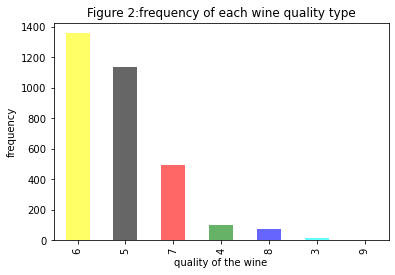

In [9]:
finaldata["quality"].value_counts().plot(kind='bar',
                                         color = ['yellow','black', 'red', 'green', 'blue', 'cyan', 'purple'],
                                         alpha = 0.6)
plt.xlabel("quality of the wine")
plt.ylabel("frequency")
plt.title("Figure 2:frequency of each wine quality type")

according to the above plot we can find out that most of the wine quality has been graded as 6.

Then I will find the relationship between wine type and each other variables.

Text(0.5, 1.0, 'Figure 3: boxplot for wine type and quality')

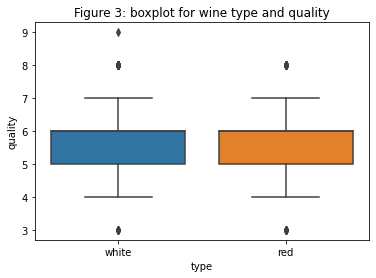

In [10]:
sns.boxplot(x = "type", y ="quality",data = finaldata).set_title('Figure 3: boxplot for wine type and quality')

From this above plot we can find out that the distribution between these two types of wine and the quality is almost the same therefore we do not need to do any process to the variables of quality.

Text(0.5, 1.0, 'Figure 4:boxplot for wine type and fixed acidity')

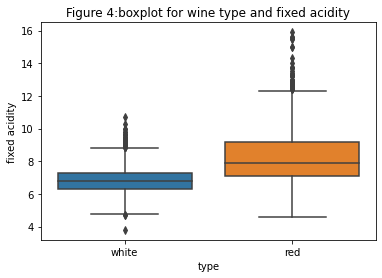

In [11]:
sns.boxplot(x = "type", y ='fixed acidity',data = finaldata).set_title('Figure 4:boxplot for wine type and fixed acidity')

Text(0.5, 1.0, 'Figure 5:overlapping hiftogram between type and fixed acidity')

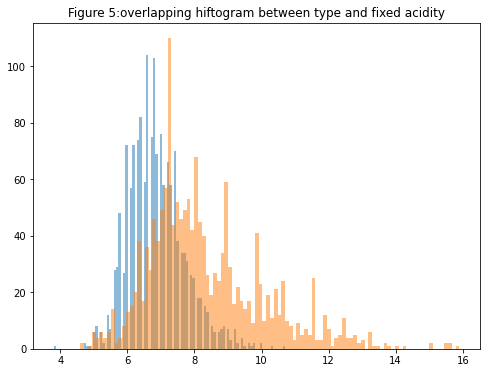

In [12]:
data1 = white['fixed acidity']
data2 = red['fixed acidity']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 5:overlapping hiftogram between type and fixed acidity")

Text(0.5, 1.0, 'Figure 6:boxplot for wine type and volatile acidity')

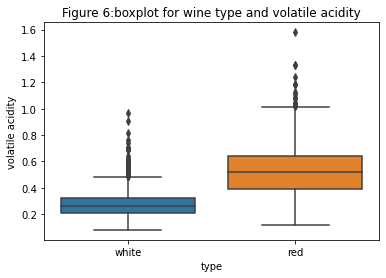

In [13]:
sns.boxplot(x = "type", y ='volatile acidity',data = finaldata).set_title('Figure 6:boxplot for wine type and volatile acidity')

Text(0.5, 1.0, 'Figure 7:overlapping hiftogram between type and volatile acidity')

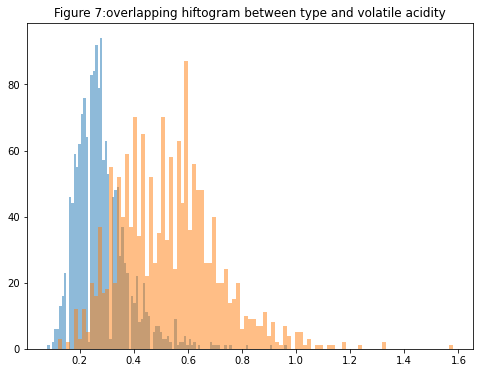

In [14]:
data1 = white['volatile acidity']
data2 = red['volatile acidity']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 7:overlapping hiftogram between type and volatile acidity")

Text(0.5, 1.0, 'Figure 8:boxplot for wine type and citric acid')

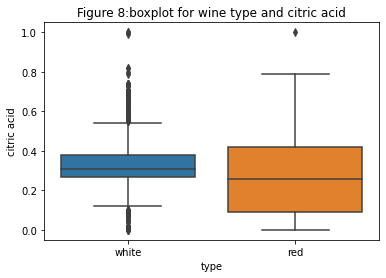

In [15]:
sns.boxplot(x = "type", y ='citric acid',data = finaldata).set_title('Figure 8:boxplot for wine type and citric acid')

Text(0.5, 1.0, 'Figure 9:overlapping hiftogram between type and citric acid')

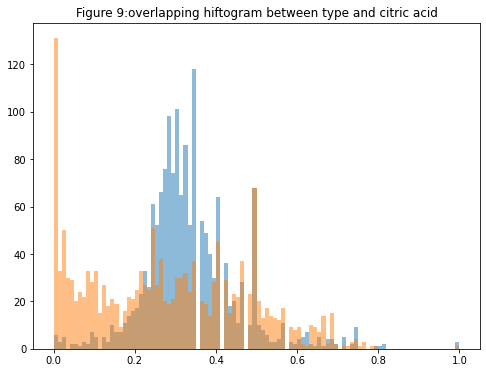

In [16]:
data1 = white['citric acid']
data2 = red['citric acid']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 9:overlapping hiftogram between type and citric acid")

Text(0.5, 1.0, 'Figure 10:boxplot for wine type and residual sugar')

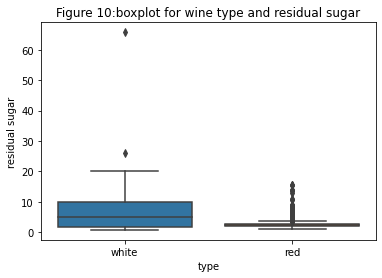

In [17]:
sns.boxplot(x = "type", y ='residual sugar',data = finaldata).set_title('Figure 10:boxplot for wine type and residual sugar')

Text(0.5, 1.0, 'Figure 11:overlapping hiftogram between type and residual sugar')

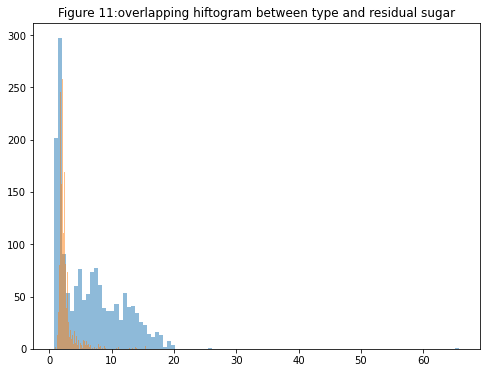

In [18]:
data1 = white['residual sugar']
data2 = red['residual sugar']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 11:overlapping hiftogram between type and residual sugar")

Text(0.5, 1.0, 'Figure 12:boxplot for wine type and chlorides')

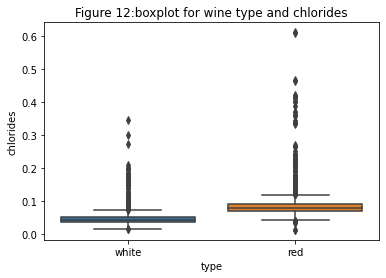

In [19]:
sns.boxplot(x = "type", y ='chlorides',data = finaldata).set_title('Figure 12:boxplot for wine type and chlorides')

Text(0.5, 1.0, 'Figure 13:overlapping hiftogram between type and chlorides')

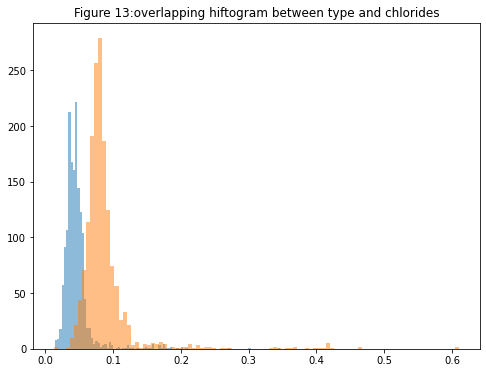

In [20]:
data1 = white['chlorides']
data2 = red['chlorides']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 13:overlapping hiftogram between type and chlorides")

Text(0.5, 1.0, 'Figure 14:boxplot for wine type and free sulfur dioxide')

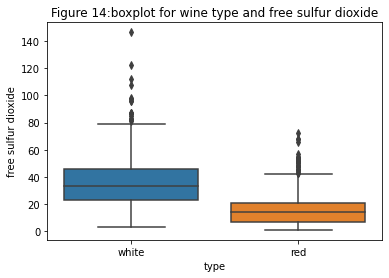

In [21]:
sns.boxplot(x = "type", y ='free sulfur dioxide',data = finaldata).set_title('Figure 14:boxplot for wine type and free sulfur dioxide')

Text(0.5, 1.0, 'Figure 15:overlapping hiftogram between type and free sulfur dioxide')

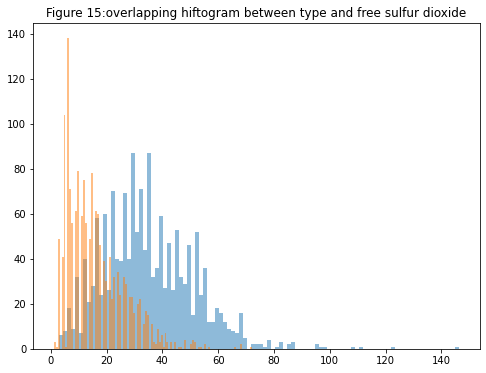

In [22]:
data1 = white['free sulfur dioxide']
data2 = red['free sulfur dioxide']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 15:overlapping hiftogram between type and free sulfur dioxide")

Text(0.5, 1.0, 'Figure 16:boxplot for wine type and total sulfur dioxide')

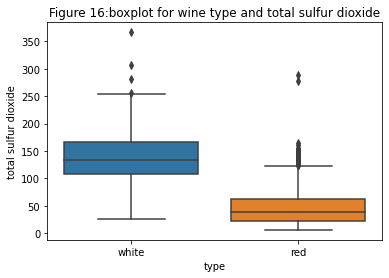

In [23]:
sns.boxplot(x = "type", y ='total sulfur dioxide',data = finaldata).set_title('Figure 16:boxplot for wine type and total sulfur dioxide')

Text(0.5, 1.0, 'Figure 17:overlapping hiftogram between type and total sulfur dioxide')

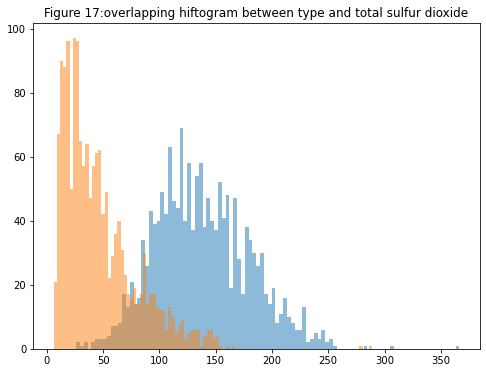

In [24]:
data1 = white['total sulfur dioxide']
data2 = red['total sulfur dioxide']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 17:overlapping hiftogram between type and total sulfur dioxide")

Text(0.5, 1.0, 'Figure 18:boxplot for wine type and density')

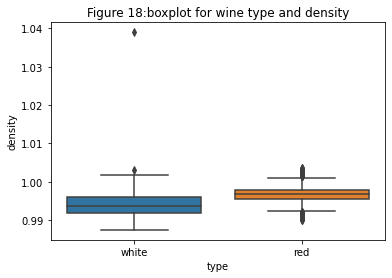

In [25]:
sns.boxplot(x = "type", y ='density',data = finaldata).set_title('Figure 18:boxplot for wine type and density')

Text(0.5, 1.0, 'Figure 19:overlapping hiftogram between type and total density')

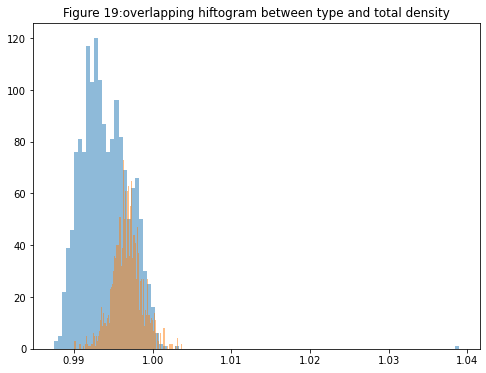

In [26]:
data1 = white['density']
data2 = red['density']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 19:overlapping hiftogram between type and total density")

Text(0.5, 1.0, 'Figure 20:boxplot for wine type and pH')

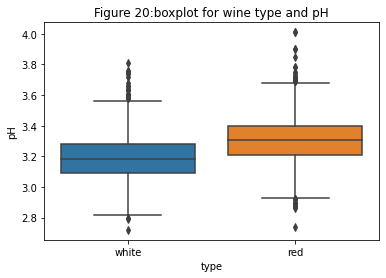

In [27]:
sns.boxplot(x = "type", y ='pH',data = finaldata).set_title('Figure 20:boxplot for wine type and pH')

Text(0.5, 1.0, 'Figure 21:overlapping hiftogram between type and pH')

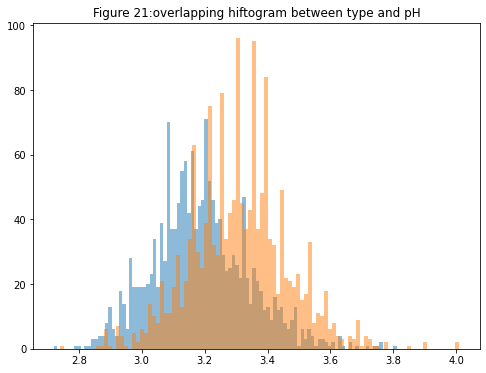

In [28]:
data1 = white['pH']
data2 = red['pH']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 21:overlapping hiftogram between type and pH")

Text(0.5, 1.0, 'Figure 22:boxplot for wine type and sulphates')

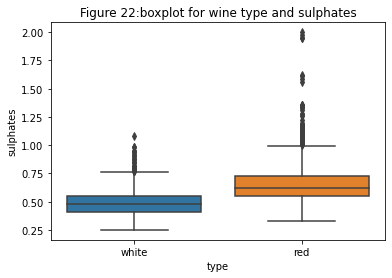

In [29]:
sns.boxplot(x = "type", y ='sulphates',data = finaldata).set_title('Figure 22:boxplot for wine type and sulphates')

Text(0.5, 1.0, 'Figure 23:overlapping hiftogram between type and sulphates')

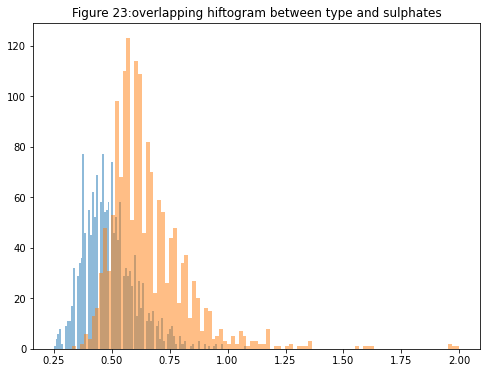

In [30]:
data1 = white['sulphates']
data2 = red['sulphates']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 23:overlapping hiftogram between type and sulphates")

Text(0.5, 1.0, 'Figure 24:boxplot for wine type and alcohol')

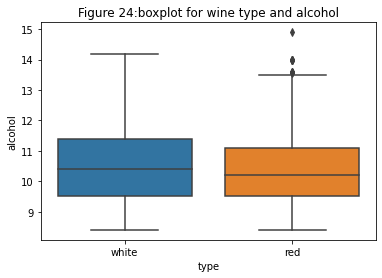

In [31]:
sns.boxplot(x = "type", y ='alcohol',data = finaldata).set_title('Figure 24:boxplot for wine type and alcohol')

Text(0.5, 1.0, 'Figure 25:overlapping hiftogram between type and alcohol')

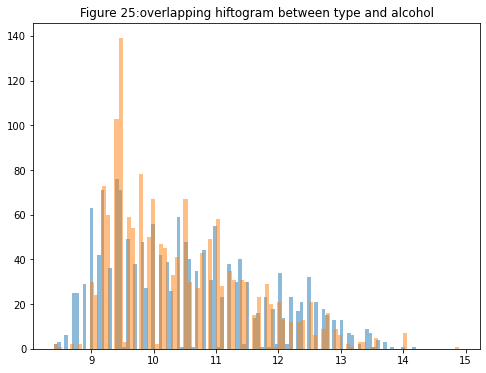

In [32]:
data1 = white['alcohol']
data2 = red['alcohol']
plt.figure(figsize=(8,6))
plt.hist(data1, bins=100, alpha=0.5, label="data1")
plt.hist(data2, bins=100, alpha=0.5, label="data2")
plt.title("Figure 25:overlapping hiftogram between type and alcohol")

According to the above data we can find out that the quality, alcohol, citric acid do not have a huge differences between white and red wine, and  sulphates,pH,chlorides have small difference in between. Therefore I will start to use some variables which do not have much differences. In addition I also draw a overlapping histogram in order to further make sure that they share the same distribution. 

## Data Spliting

In [33]:
y = finaldata["type"]
trainx, testx,trainy,testy = model_selection.train_test_split(finaldata,y,test_size = 0.3)
trainx = trainx.drop(columns = "type")
testx = testx.drop(columns = "type")

In [34]:
trainx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
896,6.8,0.180,0.28,8.7,0.047,52.0,242.0,0.99520,3.22,0.53,10.5,6
4810,5.4,0.375,0.40,3.3,0.054,29.0,147.0,0.99482,3.42,0.52,9.1,5
5574,10.8,0.400,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6
449,6.4,0.280,0.29,1.6,0.052,34.0,127.0,0.99290,3.48,0.56,10.5,7
6435,5.4,0.580,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1502,6.6,0.300,0.24,1.2,0.034,17.0,121.0,0.99330,3.13,0.36,9.2,5
6488,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
4947,5.6,0.310,0.37,1.4,0.074,12.0,96.0,0.99540,3.32,0.58,9.2,5
6230,8.4,0.390,0.10,1.7,0.075,6.0,25.0,0.99581,3.09,0.43,9.7,6


Since the originally type of the type variables is a object type variables, However in order to use the Lasso Regression, Linear Regression, and Logistic Regression we need to make our prediction variables into dummy variables type as follows.

In [35]:
trainy = pd.get_dummies(trainy)
trainy

,red,white
896,0,1
4810,0,1
5574,1,0
449,0,1
6435,1,0
...,...,...
1502,0,1
6488,1,0
4947,1,0
6230,1,0


In [36]:
trainy = trainy.drop(columns = "red")

In [37]:
trainy

,white
896,1
4810,1
5574,0
449,1
6435,0
...,...
1502,1
6488,0
4947,0
6230,0


In [38]:
testx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
277,7.7,0.260,0.40,1.1,0.042,9.0,60.0,0.99150,2.89,0.50,10.6,5
2804,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8
6479,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1310,5.2,0.365,0.08,13.5,0.041,37.0,142.0,0.99700,3.46,0.39,9.9,6
3848,7.1,0.390,0.79,1.4,0.194,23.0,90.0,0.99212,3.17,0.46,10.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6372,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
5014,8.3,0.540,0.28,1.9,0.077,11.0,40.0,0.99780,3.39,0.61,10.0,6
5827,8.7,0.330,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0,7
5299,7.7,0.260,0.30,1.7,0.059,20.0,38.0,0.99490,3.29,0.47,10.8,6


In [39]:
testy = pd.get_dummies(testy)

In [40]:
testy = testy.drop(columns= "red")

In [41]:
testy

,white
277,1
2804,1
6479,0
1310,1
3848,1
...,...
6372,0
5014,0
5827,0
5299,0


# Initial Model

In [42]:
trainx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
896,6.8,0.180,0.28,8.7,0.047,52.0,242.0,0.99520,3.22,0.53,10.5,6
4810,5.4,0.375,0.40,3.3,0.054,29.0,147.0,0.99482,3.42,0.52,9.1,5
5574,10.8,0.400,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6
449,6.4,0.280,0.29,1.6,0.052,34.0,127.0,0.99290,3.48,0.56,10.5,7
6435,5.4,0.580,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1502,6.6,0.300,0.24,1.2,0.034,17.0,121.0,0.99330,3.13,0.36,9.2,5
6488,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
4947,5.6,0.310,0.37,1.4,0.074,12.0,96.0,0.99540,3.32,0.58,9.2,5
6230,8.4,0.390,0.10,1.7,0.075,6.0,25.0,0.99581,3.09,0.43,9.7,6


For the first model I will use the variables which do not have a huge difference between red and white wine, which are quality, alcohol, citric acid

In [43]:
train_new = trainx[["quality", "alcohol", "citric acid"]]
train_new

,quality,alcohol,citric acid
896,6,10.5,0.28
4810,5,9.1,0.40
5574,6,9.3,0.41
449,7,10.5,0.29
6435,6,10.2,0.08
...,...,...,...
1502,5,9.2,0.24
6488,6,11.6,0.15
4947,5,9.2,0.37
6230,6,9.7,0.10


In [44]:
test_new = testx[["quality", "alcohol", "citric acid"]]
test_new

,quality,alcohol,citric acid
277,5,10.6,0.40
2804,8,10.9,0.32
6479,5,11.3,0.09
1310,6,9.9,0.08
3848,6,10.5,0.79
...,...,...,...
6372,5,8.8,0.50
5014,6,10.0,0.28
5827,7,12.0,0.38
5299,6,10.8,0.30


In [45]:
lgm = linear_model.LinearRegression()
lgm.fit(train_new, trainy)

LinearRegression()

In [46]:
print(lgm.coef_)

[[ 0.07396307 -0.00872989  0.50076945]]


In [47]:
lgmtrain1 = lgm.score(train_new,trainy)
lgmtrain1

0.04639308053873359

In [48]:
lgmtest1 = lgm.score(test_new,testy)
lgmtest1

0.05478153353243098

In [49]:
MSEtrainlgm = metrics.mean_squared_error(trainy, lgm.predict(train_new))
MSEtestlgm = metrics.mean_squared_error(testy,lgm.predict(test_new))
MSEtestlgm

0.23580405012452263

In [50]:
lasso = linear_model.Lasso()
lasso.fit(train_new, trainy)

Lasso()

In [51]:
print(lasso.coef_)

[0. 0. 0.]


In [52]:
lassotrain1= lasso.score(train_new,trainy)

In [53]:
lassotest1 = lasso.score(test_new,testy)

In [54]:
MSEtrainlasso = metrics.mean_squared_error(trainy, lasso.predict(train_new))
MSEtestlasso = metrics.mean_squared_error(testy,lasso.predict(test_new))
MSEtestlasso

0.2505513868430492

In [55]:
logit = linear_model.LogisticRegression(solver="sag")
logit.fit(train_new, trainy)

/Users/harryzhang/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='sag')

In [56]:
print(logit.coef_)

[[ 0.31132542 -0.03845861  1.9497071 ]]


In [57]:
logittrain1 =logit.score(train_new,trainy)

In [58]:
logittest1 = logit.score(test_new,testy)

In [59]:
MSEtrainlogit = metrics.mean_squared_error(trainy, logit.predict(train_new))
MSEtestlogit = metrics.mean_squared_error(testy,logit.predict(test_new))
MSEtestlogit

0.3692468619246862

In [60]:
data = {'test':[MSEtestlgm,MSEtestlogit,MSEtestlasso],'train':[MSEtrainlgm,MSEtrainlogit,MSEtrainlasso]}
pd.DataFrame(data, index =['Linear Reg', 'Logistic', 'Lasso'])

,test,train
Linear Reg,0.235804,0.238309
Logistic,0.369247,0.379821
Lasso,0.250551,0.249903


In [61]:
coef = {'X1':[lgm.coef_[0][0],lasso.coef_[0],logit.coef_[0][0]],'X2':[lgm.coef_[0][1],lasso.coef_[1],logit.coef_[0][1]],'X3':[lgm.coef_[0][2],lasso.coef_[2],logit.coef_[0][2]]}
pd.DataFrame(coef, index =['Linear Reg','Lasso', 'Logistic' ])

,X1,X2,X3
Linear Reg,0.073963,-0.008730,0.500769
Lasso,0.000000,0.000000,0.000000
Logistic,0.311325,-0.038459,1.949707


As we can see from the above MSE, the mse number is really small which means that this is not a proper model , or these variables is not choosing properly. In order to make our model more accurate we need to involve more variables and delete any variables which is not proper. In order to find more feature for the variables I will draw more plot in order to show the features.

In [62]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b

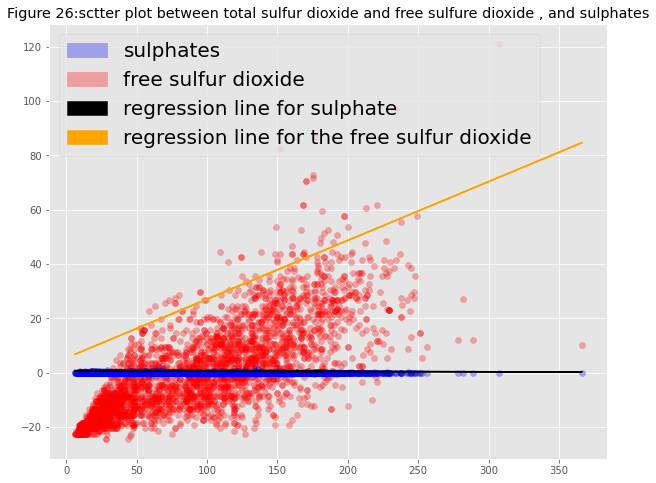

In [63]:
style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x = finaldata["total sulfur dioxide"],y =[finaldata["free sulfur dioxide"]-finaldata["free sulfur dioxide"].mean()],c = "red",alpha = 0.3)
ax.scatter(x = finaldata["total sulfur dioxide"],y =[finaldata["sulphates"]-finaldata["sulphates"].mean()], c= "blue",alpha = 0.3)
pop_a = mpatches.Patch(color='red', label='free sulfur dioxide',alpha = 0.3)
pop_b = mpatches.Patch(color='blue', label='sulphates',alpha = 0.3)
pop_c = mpatches.Patch(color='black', label='regression line for sulphate')
pop_d = mpatches.Patch(color="orange", label = "regression line for the free sulfur dioxide")
plt.title("Figure 26:sctter plot between total sulfur dioxide and free sulfure dioxide , and sulphates")
ax.legend(handles=[pop_b,pop_a,pop_c,pop_d],prop={"size":20})
m1,b1 = best_fit_slope_and_intercept(finaldata["total sulfur dioxide"],finaldata["sulphates"])
best_fit_line = [(m1*x)+b1 for x in finaldata["total sulfur dioxide"]]
m2,b2 = best_fit_slope_and_intercept(finaldata["total sulfur dioxide"],finaldata["free sulfur dioxide"])
best_fit_line2 = [(m2*x)+b2 for x in finaldata["total sulfur dioxide"]]
plt.plot(finaldata["total sulfur dioxide"], best_fit_line, c = "black")
plt.plot(finaldata["total sulfur dioxide"],best_fit_line2,c = "orange")


According to this scatter plot we can find out that there is not relationshiop between sulphate and total sulfur dioxide, however in order to prevent the potential scaling mistakes I will write an individual scatter plot between sulphates and total sulfur dioxide.

Text(0, 0.5, 'sulphates')

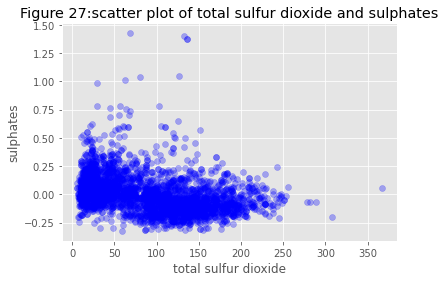

In [64]:
plt.scatter(x = finaldata["total sulfur dioxide"],y =[finaldata["sulphates"]-finaldata["sulphates"].mean()], c= "blue",alpha = 0.3)
plt.title("Figure 27:scatter plot of total sulfur dioxide and sulphates")
plt.xlabel("total sulfur dioxide")
plt.ylabel("sulphates")

According to the scatter plot we can make sure that the relation ship between sulphates and total sulfur dioxide are really small.

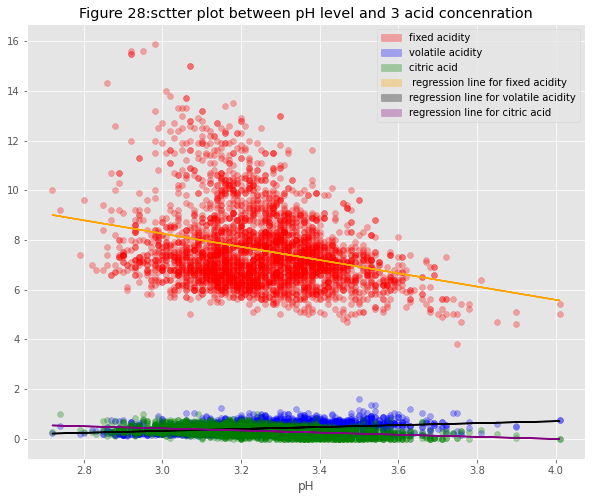

In [65]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x = finaldata["pH"],y =finaldata["fixed acidity"],c = "red",alpha = 0.3)
ax.scatter(x = finaldata["pH"],y =finaldata["volatile acidity"], c= "blue",alpha = 0.3)
ax.scatter(x = finaldata["pH"],y =finaldata["citric acid"], c= "green",alpha = 0.3)
pop_a = mpatches.Patch(color='red', label='fixed acidity',alpha = 0.3)
pop_b = mpatches.Patch(color='blue', label='volatile acidity',alpha = 0.3)
pop_c = mpatches.Patch(color='green', label='citric acid',alpha = 0.3)
pop_d = mpatches.Patch(color="orange", label=' regression line for fixed acidity',alpha = 0.3)
pop_e = mpatches.Patch(color="black", label='regression line for volatile acidity',alpha = 0.3)
pop_f = mpatches.Patch(color="purple", label='regression line for citric acid',alpha = 0.3)

m1,b1 = best_fit_slope_and_intercept(finaldata["pH"],finaldata["fixed acidity"])
best_fit_line = [(m1*x)+b1 for x in finaldata["pH"]]
m2,b2 = best_fit_slope_and_intercept(finaldata["pH"],finaldata["volatile acidity"])
best_fit_line2 = [(m2*x)+b2 for x in finaldata["pH"]]
m3,b3 = best_fit_slope_and_intercept(finaldata["pH"],finaldata["citric acid"])
best_fit_line3 = [(m3*x)+b3 for x in finaldata["pH"]]
plt.plot(finaldata["pH"], best_fit_line, c = "orange")
plt.plot(finaldata["pH"],best_fit_line2,c = "black")
plt.plot(finaldata["pH"],best_fit_line3,c = "purple")
plt.xlabel("pH")

plt.title("Figure 28:sctter plot between pH level and 3 acid concenration")
ax.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e,pop_f])

This scatter plot shows that similar trend between pH and volatile acidity and ph with citric acid. As usual I will draw two individual scatter plot for this two relationship in order to prevent the potential scaling error. 

Text(0.5, 1.0, 'Figure 29:scatter plot between pH and citric acid')

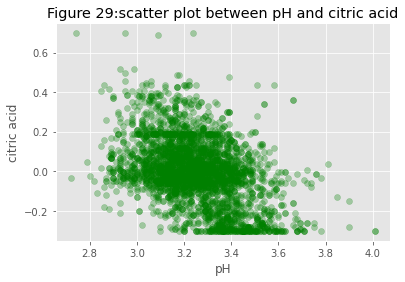

In [66]:
plt.scatter(x = finaldata["pH"],y =[finaldata["citric acid"]-finaldata["citric acid"].mean()], c= "green",alpha = 0.3)
plt.xlabel("pH")
plt.ylabel("citric acid")
plt.title("Figure 29:scatter plot between pH and citric acid")

Text(0.5, 1.0, 'Figure 30:scatter plot between pH and volatile acidity')

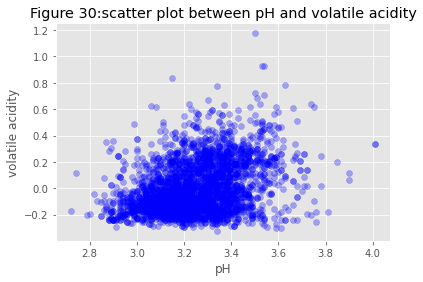

In [67]:
plt.scatter(x = finaldata["pH"],y =[finaldata["volatile acidity"]-finaldata["volatile acidity"].mean()], c= "blue",alpha = 0.3)
plt.xlabel("pH")
plt.ylabel("volatile acidity")
plt.title("Figure 30:scatter plot between pH and volatile acidity")

According to the above two individual scatter plot we can find out that there are some relationship exists, between pH and volatile acidity and ph with citric acid, so when we modified the model I will further analysis we will take these relationships into the consideration. 

## Improved model

As what we found previously we can find out that there is a relationship between acid and pH and sulphr dioxide and sulphate. Therefore I will use "fixed acidity","pH","citric acid","total sulfur dioxide","sulphates","volatile acidity" as my new model variables. 

In [68]:
trainx_final = trainx[["fixed acidity","pH","citric acid","total sulfur dioxide","sulphates","volatile acidity"]]
testx_final = testx[["fixed acidity","pH","citric acid","total sulfur dioxide","sulphates","volatile acidity"]]

In [69]:
lgm2 = linear_model.LinearRegression()
lgm2.fit(trainx_final, trainy)

LinearRegression()

In [70]:
lgm2.coef_

array([[-0.08039585, -0.50873323,  0.09387081,  0.00341479, -0.58866823,
        -0.82804142]])

In [71]:
lgmtrain2 = lgm2.score(trainx_final,trainy)
lgmtrain2

0.8004587170848885

In [72]:
lgmtest2= lgm2.score(testx_final,testy)
lgmtest2

0.8065910674376585

In [73]:
MSEtrainlgmfinal = metrics.mean_squared_error(trainy, lgm2.predict(trainx_final))
MSEtestlgmfinal = metrics.mean_squared_error(testy,lgm2.predict(testx_final))
MSEtestlgmfinal

0.048249808109335726

In [74]:
lasso2 = linear_model.Lasso()
lasso2.fit(trainx_final, trainy)

Lasso()

In [75]:
lasso2.coef_

array([-0.        , -0.        ,  0.        ,  0.00620286, -0.        ,
       -0.        ])

In [76]:
lassotest2= lasso2.score(testx_final,testy)

In [77]:
lassotrain2 = lasso2.score(trainx_final,trainy)

In [78]:
MSEtrainlassofinal = metrics.mean_squared_error(trainy, lasso2.predict(trainx_final))
MSEtestlassofinal = metrics.mean_squared_error(testy,lasso2.predict(testx_final))
MSEtestlasso

0.2505513868430492

Since our model is an unscaled model therefore the solver "sag" in the Logistic Regression is not properate According to the API documentation of the sklearn we can know that the solver "newton-cg" is the solver that fit this situation therefore in this new model I will use the new solver to fit the model. 

In [79]:
logit2 = linear_model.LogisticRegression(solver="newton-cg")
logit2.fit(trainx_final, trainy)

/Users/harryzhang/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='newton-cg')

In [80]:
logit2.coef_

array([[-1.06240045, -4.62869272,  1.33431829,  0.04642086, -4.67091777,
        -7.26668168]])

In [81]:
logittrain2 = logit2.score(trainx_final,trainy)
logittrain2

0.9717488789237668

In [82]:
logittest2 = logit2.score(testx_final,testy)
logittest2

0.9738493723849372

In [83]:
MSEtrainlogitfinalfinal = metrics.mean_squared_error(trainy, logit2.predict(trainx_final))
MSEtestlogitfinalfinal = metrics.mean_squared_error(testy,logit2.predict(testx_final))
MSEtestlogitfinalfinal

0.02615062761506276

In [84]:
data = {'test':[MSEtestlgm,MSEtestlogit,MSEtestlasso],'train':[MSEtrainlgm,MSEtrainlogit,MSEtrainlasso]}
old = pd.DataFrame(data, index =['Linear Reg', 'Logistic', 'Lasso'])
data_final = {'test':[MSEtestlgmfinal,MSEtestlogitfinalfinal,MSEtestlassofinal],'train':[MSEtrainlgmfinal,MSEtrainlogitfinalfinal,MSEtrainlassofinal]}
new = pd.DataFrame(data_final, index =['Linear Reg', 'Logistic', 'Lasso'])


In [85]:
old 

,test,train
Linear Reg,0.235804,0.238309
Logistic,0.369247,0.379821
Lasso,0.250551,0.249903


In [86]:
new

,test,train
Linear Reg,0.048250,0.049866
Logistic,0.026151,0.028251
Lasso,0.102240,0.101128


In [87]:
data_compare = {'test':[lgmtest1,lgmtest2,lassotest1,lassotest2,logittest1,logittest2],'train':[lgmtrain1,lgmtrain2,lassotrain1,lassotrain2,logittrain1,logittrain2]}
compare = pd.DataFrame(data_compare, index =['Linear Reg old','Linear Reg new','Lasso old','Lasso new','Logistic old','Logistic new'])
compare

,test,train
Linear Reg old,0.054782,0.046393
Linear Reg new,0.806591,0.800459
Lasso old,-0.004333,0.000000
Lasso new,0.590171,0.595331
Logistic old,0.630753,0.620179
Logistic new,0.973849,0.971749


In [88]:
coef = {'X1':[lgm2.coef_[0][0],lasso2.coef_[0],logit2.coef_[0][0]],'X2':[lgm2.coef_[0][1],lasso2.coef_[1],logit2.coef_[0][1]],'X3':[lgm2.coef_[0][2],lasso2.coef_[2],logit2.coef_[0][2]],'X4':[lgm2.coef_[0][3],lasso2.coef_[3],logit2.coef_[0][3]],'X5':[lgm2.coef_[0][4],lasso2.coef_[4],logit2.coef_[0][4]],'X6':[lgm2.coef_[0][5],lasso2.coef_[5],logit2.coef_[0][5]]}
pd.DataFrame(coef, index =['Linear Reg', 'Lasso', 'Logistic'])

,X1,X2,X3,X4,X5,X6
Linear Reg,-0.080396,-0.508733,0.093871,0.003415,-0.588668,-0.828041
Lasso,-0.000000,-0.000000,0.000000,0.006203,-0.000000,-0.000000
Logistic,-1.062400,-4.628693,1.334318,0.046421,-4.670918,-7.266682


By comparing the old model with the new model we can get that the overall accuracy is increasing and we can find out that the final accuracy is aroung 97% for logistic model which means this model is relatively good for the prediction. In Addition by comparing the MSE value for both new model and the old model we can find out that the new model MSE value is smaller than the old model MSE this also states that the overall model accuracy is good enough. 

In addition by comparing the coefficient value of the new version model and old version model we can find out that this time the coefficient of the Lasso is no longer all 0s there more we can know that this model is better than the old version one. 

# reference
dataset：
1. https://www.kaggle.com/datasets/rajyellow46/wine-quality
2. https://www.kaggle.com/code/brendangberkman/wine-type-prediction this link is a prediction project that is similar to mine. I did not copy/paraphrase any code from this project, but just in case that there might be some similar code with this project. 
3. https://archive.ics.uci.edu/ml/datasets/wine+quality

other reference：  
1. https://blog.csdn.net/qq_31279347/article/details/82795405
1. https://blog.csdn.net/wanglingli95/article/details/78887771
3. https://datacarpentry.org/python-socialsci/11-joins/index.html
4. https://www.cnblogs.com/yanjy-onlyone/p/11288098.html
5. https://www.geeksforgeeks.org/how-to-convert-categorical-data-to-binary-data-in-python/
6. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
7. https://scikit-learn.org/stable/glossary.html#term-random_state
8. https://stackoverflow.com/questions/36856428/attributeerror-function-object-has-no-attribute-bar-in-pandas
9. https://stackoverflow.com/questions/52404971/get-a-list-of-categories-of-categorical-variable-python-pandas
10. https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/"
11. https://www.javatpoint.com/how-to-create-a-dataframes-in-python
12. https://moonbooks.org/Articles/How-to-add-a-legend-for-a-scatter-plot-in-matplotlib-/
13. https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/
14. https://python-graph-gallery.com/3-control-color-of-barplots
15. https://scikit-learn.org/stable/modules/linear_model.html
16. https://git-lfs.github.com/
17. https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
18. https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
19. https://stackabuse.com/change-figure-size-in-matplotlib/
20. https://www.adamsmith.haus/python/answers/how-to-change-the-font-size-of-a-matplotlib-legend-in-python
21. https://datavizpyr.com/overlapping-histograms-with-matplotlib-in-python/
22. https://realpython.com/linear-regression-in-python/